In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from IPython import get_ipython
ipython = get_ipython()
ipython.Completer.use_jedi = False

## divisione dati

In [15]:
train= pd.read_csv('asset/progetto tv/train.csv')


In [223]:
test=pd.read_csv('asset/progetto tv/test.csv',delimiter=';')
x_test=test[['title_word_count', 'document_entropy', 'freshness', 'easiness',
       'fraction_stopword_presence', 'normalization_rate', 'speaker_speed',
       'silent_period_rate']]

In [21]:
print(train.shape)
print(test.shape)# il test ha una colonna in meno perchè la dobbiamo predirre

(9239, 10)
(2309, 9)


In [44]:
x_tr=train[['title_word_count', 'document_entropy', 'freshness', 'easiness',
       'fraction_stopword_presence', 'normalization_rate', 'speaker_speed',
       'silent_period_rate']]
y_tr=train['engagement']

In [59]:
x_tr.head(2)

,title_word_count,document_entropy,freshness,easiness,fraction_stopword_presence,normalization_rate,speaker_speed,silent_period_rate
0,9,7.753995,16310,75.583936,0.553664,0.034049,2.997753,0.0
1,6,8.305269,15410,86.870523,0.584498,0.018763,2.635789,0.0


### split del training set in train e validation

In [49]:
x_train,x_validation,y_train,y_validation=train_test_split(x_tr,y_tr)

In [51]:
x_train.shape,x_validation.shape,y_train.shape,y_validation.shape

((6929, 8), (2310, 8), (6929,), (2310,))

In [53]:
x_validation.head(2)

,title_word_count,document_entropy,freshness,easiness,fraction_stopword_presence,normalization_rate,speaker_speed,silent_period_rate
7997,8,7.725720,14820,79.972384,0.571082,0.015347,1.886154,0.287657
4860,7,7.417372,14410,88.277468,0.657668,0.016498,1.879286,0.304267


In [61]:
corr=x_train.corr()

<Axes: >

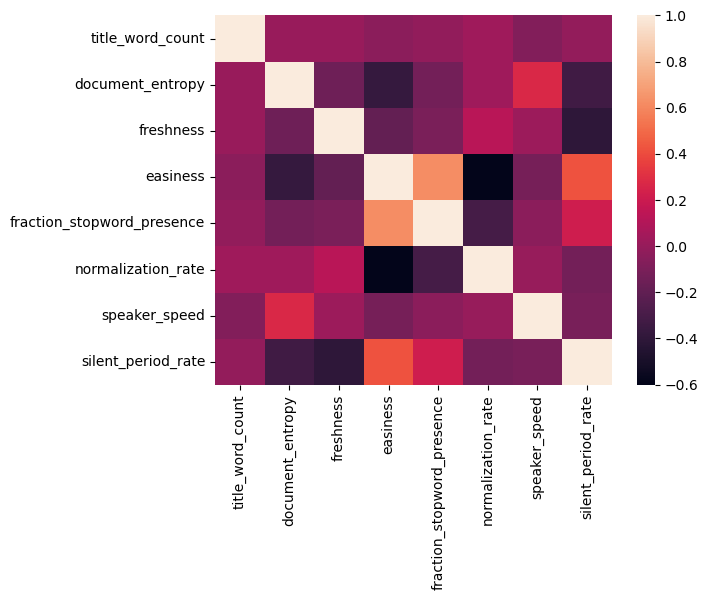

In [63]:
sns.heatmap(corr)

## random forest

In [69]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

results = []

def specificity_score(y_true, y_pred):
    """Calculate specificity from the confusion matrix"""
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

# Loop over different hyperparameter values
for i in (5, 6, 7, 8, 9, 11):  # max_depth
    for g in (3, 4, 5, 6):  # max_features
        for h in (0.11, 0.12, 0.13):  # Probability threshold
            
            # Train the model with specified parameters
            rand_for = RandomForestClassifier(random_state=0, max_depth=i, max_features=g)
            rand_for.fit(x_train, y_train)

            # Get class probabilities
            predict = rand_for.predict_proba(x_validation)[:, 1]

            # Apply the custom threshold
            y_pred = (predict >= h).astype(int)  

            # Compute metrics
            acc = accuracy_score(y_validation, y_pred)
            rec = recall_score(y_validation, y_pred)
            prec = precision_score(y_validation, y_pred)
            spec = specificity_score(y_validation, y_pred)
            f1_scor = f1_score(y_validation, y_pred)

            # Store results
            results.append({
                'max_depth': i,
                'max_features': g,
                'threshold': h,  
                'accuracy': acc,
                'recall': rec,
                'precision': prec,
                'specificity': spec,
                'f1_score': f1_scor
            })

# Convert results into a DataFrame
results_df_rf = pd.DataFrame(results)


In [70]:
results_df_rf.sort_values(by='f1_score',ascending=False)  #scegliamo il modello d:5,f:3 

,max_depth,max_features,threshold,accuracy,recall,precision,specificity,f1_score
2,5,3,0.13,0.891775,0.762136,0.438547,0.904468,0.556738
32,7,5,0.13,0.888745,0.776699,0.431267,0.899715,0.554593
29,7,4,0.13,0.887879,0.776699,0.428954,0.898764,0.552677
11,5,6,0.13,0.887446,0.771845,0.427419,0.898764,0.550173
59,9,6,0.13,0.886580,0.771845,0.425134,0.897814,0.548276
...,...,...,...,...,...,...,...,...
60,11,3,0.11,0.861472,0.810680,0.372768,0.866445,0.510703
69,11,6,0.11,0.861472,0.800971,0.371622,0.867395,0.507692
0,5,3,0.11,0.860606,0.805825,0.370536,0.865970,0.507645
12,6,3,0.11,0.861472,0.791262,0.370455,0.868346,0.504644


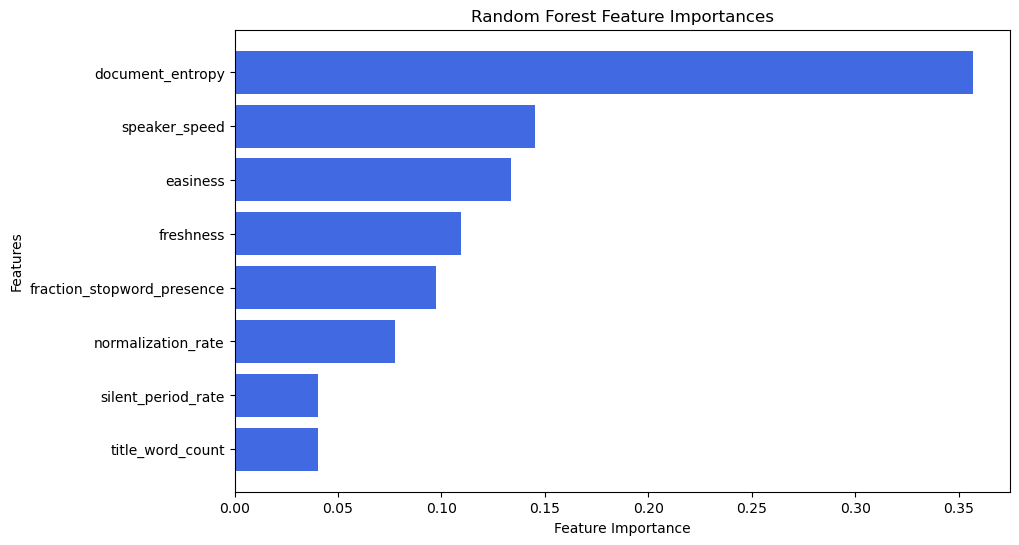

In [71]:
feature_importances = rand_for.feature_importances_

# Creare un DataFrame con le feature e le loro importanze
features_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})

# Ordinare le feature per importanza decrescente
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot delle feature importance
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='royalblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()  # Invertire l'asse per mostrare la più importante in alto
plt.show()

### logistic regression

In [81]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

# Addestrare il modello di regressione logistica

results = []

# Loop su diversi valori di C (regolarizzazione)
for i in (0.0001, 0.001, 0.01, 0.1, 1, 10, 100):
    for g in (0.1, 0.12, 0.13, 0.14, 0.15):  # Indentazione corretta
        # Addestrare il modello con valore di C variabile
        log_reg = LogisticRegression(max_iter=10000, C=i)
        log_reg.fit(x_train, y_train)

        # Ottenere le probabilità della classe positiva
        log_prob = log_reg.predict_proba(x_validation)[:, 1]

        # Applicare la soglia personalizzata (g variabile)
        log_predict = (log_prob > g).astype(int)

        # Calcolare le metriche
        acc_log = accuracy_score(y_validation, log_predict)
        rec_log = recall_score(y_validation, log_predict)
        prec_log = precision_score(y_validation, log_predict)
        spec_log = specificity_score(y_validation, log_predict)
        f1_scor_log = f1_score(y_validation, log_predict)

        # Aggiungere i risultati alla lista, includendo la soglia g
        results.append({
            "C": i,
            "Threshold": g,  # Aggiunto threshold g ai risultati
            "Accuracy": acc_log,
            "Recall": rec_log,
            "Precision": prec_log,
            "Specificity": spec_log,
            "F1-score": f1_scor_log
        })

# Convertire la lista in un DataFrame
result_log_df = pd.DataFrame(results)


In [83]:
result_log_df_sorted = result_log_df.sort_values(by="F1-score", ascending=False)

In [85]:
result_log_df_sorted #threshold=0.15,c=100.000

,C,Threshold,Accuracy,Recall,Precision,Specificity,F1-score
34,100.0000,0.15,0.854978,0.684466,0.343066,0.871673,0.457050
24,1.0000,0.15,0.852814,0.689320,0.339713,0.868821,0.455128
29,10.0000,0.15,0.850216,0.694175,0.335681,0.865494,0.452532
19,0.1000,0.15,0.854113,0.669903,0.339066,0.872148,0.450245
33,100.0000,0.14,0.843290,0.708738,0.325893,0.856464,0.446483
14,0.0100,0.15,0.848918,0.679612,0.330969,0.865494,0.445151
32,100.0000,0.13,0.834199,0.742718,0.316770,0.843156,0.444122
18,0.1000,0.14,0.841558,0.708738,0.323009,0.854563,0.443769
17,0.1000,0.13,0.827706,0.757282,0.309524,0.834601,0.439437
28,10.0000,0.14,0.839827,0.703883,0.319383,0.853137,0.439394


#### boosting

In [75]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

# Lista per salvare i risultati
results_boosting = []

# Definizione dei valori da testare
lr_values = (0.1,)
n_est_values = (50,)
threshold_values = (0.12, 0.13)
depth_values = (5, 5, 7, 8, 9, 10)
features_values = (3, 4, 5, 6, 7, 8)

for i in lr_values:
    for n in n_est_values:
        for d in depth_values:
            for f in features_values:
                # Addestramento del modello con i parametri attuali
                grad_boost = GradientBoostingClassifier(
                    learning_rate=i, 
                    n_estimators=n, 
                    max_depth=d, 
                    max_features=f
                )
                grad_boost.fit(x_train, y_train)  # Assicurati che x_train e y_train siano definiti

                # Probabilità predette
                prob_boost = grad_boost.predict_proba(x_validation)[:, 1]

                for h in threshold_values:
                    # Predizioni con la soglia h
                    predict_boost = (prob_boost > h).astype(int)

                    # Calcolo metriche
                    acc_boost = accuracy_score(y_validation, predict_boost)
                    rec_boost = recall_score(y_validation, predict_boost)
                    prec_boost = precision_score(y_validation, predict_boost)
                    f1_boost = f1_score(y_validation, predict_boost)

                    # Specificità (1 - false positive rate)
                    tn, fp, fn, tp = confusion_matrix(y_validation, predict_boost).ravel()
                    spec_boost = tn / (tn + fp) if (tn + fp) > 0 else 0  # Evita divisione per zero

                    # Aggiunta ai risultati
                    results_boosting.append({
                        "Learning Rate": i,
                        "n_estimators": n,
                        "Max Depth": d,
                        "Max Features": f,
                        "Threshold": h,
                        "Accuracy": acc_boost,
                        "Recall": rec_boost,
                        "Precision": prec_boost,
                        "Specificity": spec_boost,
                        "F1-score": f1_boost
                    })

# Convertire la lista in un DataFrame
results_boosting_df = pd.DataFrame(results_boosting)


In [77]:
results_boosting_df.sort_values(by='F1-score',ascending=False).head(12) #n_estimator=50,lr=0.1,depth=8,features=4

,Learning Rate,n_estimators,Max Depth,Max Features,Threshold,Accuracy,Recall,Precision,Specificity,F1-score
61,0.1,50,10,3,0.13,0.919481,0.660194,0.539683,0.944867,0.593886
60,0.1,50,10,3,0.12,0.918182,0.665049,0.533074,0.942966,0.591793
49,0.1,50,9,3,0.13,0.916883,0.660194,0.527132,0.942015,0.586207
69,0.1,50,10,7,0.13,0.917316,0.650485,0.529644,0.943441,0.583878
67,0.1,50,10,6,0.13,0.917749,0.635922,0.532520,0.945342,0.579646
48,0.1,50,9,3,0.12,0.912987,0.669903,0.509225,0.936787,0.578616
66,0.1,50,10,6,0.12,0.916017,0.645631,0.523622,0.942490,0.578261
68,0.1,50,10,7,0.12,0.914286,0.655340,0.515267,0.939639,0.576923
51,0.1,50,9,4,0.13,0.909091,0.694175,0.493103,0.930133,0.576613
39,0.1,50,8,4,0.13,0.906926,0.703883,0.484950,0.926806,0.574257


### curve roc auc

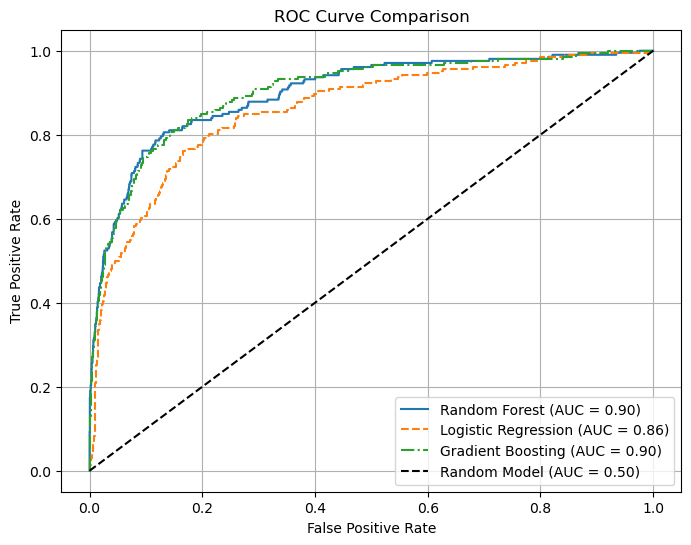

In [89]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 
rf_fin = RandomForestClassifier(max_depth=5, max_features=3, random_state=0).fit(x_train, y_train)
log_reg_fin = LogisticRegression(max_iter=10000, C=100000, random_state=0).fit(x_train, y_train)
boosting_fin = GradientBoostingClassifier(n_estimators=50,max_features=4 ,learning_rate=0.1, max_depth=8, random_state=0).fit(x_train, y_train)

# Calcolare le probabilità predette per la classe positiva (colonna 1)
prob_rf_fin = rf_fin.predict_proba(x_validation)[:, 1] 
prob_log_reg_fin = log_reg_fin.predict_proba(x_validation)[:, 1]
prob_boosting_fin = boosting_fin.predict_proba(x_validation)[:, 1]

# Calcolare le curve ROC
fpr1, tpr1, _ = roc_curve(y_validation, prob_rf_fin)
fpr2, tpr2, _ = roc_curve(y_validation, prob_log_reg_fin)
fpr3, tpr3, _ = roc_curve(y_validation, prob_boosting_fin)

# Calcolare l'area sotto la curva AUC
auc1 = auc(fpr1, tpr1)
auc2 = auc(fpr2, tpr2)
auc3 = auc(fpr3, tpr3)

# Tracciare le curve ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, label=f'Random Forest (AUC = {auc1:.2f})', linestyle='-')
plt.plot(fpr2, tpr2, label=f'Logistic Regression (AUC = {auc2:.2f})', linestyle='--')
plt.plot(fpr3, tpr3, label=f'Gradient Boosting (AUC = {auc3:.2f})', linestyle='-.')

# Linea diagonale che rappresenta il modello casuale
plt.plot([0, 1], [0, 1], 'k--', label="Random Model (AUC = 0.50)")

# Etichette e titolo
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid()

# Mostrare il grafico
plt.show()

In [91]:
results_modelli = []

# Soglie da testare
thresholds = [0.12, 0.13]

# Lista dei modelli e dei loro nomi
models = {
    "Random Forest": rf_fin,
    "Logistic Regression": log_reg_fin,
    "Gradient Boosting": boosting_fin
}

# Calcolo delle metriche per ogni modello con diverse soglie
for name, model in models.items():
    # Ottenere le probabilità della classe positiva
    y_prob = model.predict_proba(x_validation)[:, 1]
    
    for threshold in thresholds:
        # Applicare la soglia personalizzata
        y_pred = (y_prob >= threshold).astype(int)

        # Calcolare le metriche
        acc = accuracy_score(y_validation, y_pred)
        rec = recall_score(y_validation, y_pred)  # Sensitivity = Recall
        f1 = f1_score(y_validation, y_pred)
        prec=precision_score(y_validation,y_pred)

        # Aggiungere i risultati alla lista
        results_modelli.append({
            "Model": name,
            "Threshold": threshold,
            "Accuracy": acc,
            "Sensitivity (Recall)": rec,
            "Specificity": spec,
            "F1-score": f1,
            'precision':prec
        })

# Creare il DataFrame con i risultati
results_df_modelli = pd.DataFrame(results_modelli)

In [76]:
results_df_modelli.sort_values(by='F1-score',ascending=False)

,Model,Threshold,Accuracy,Sensitivity (Recall),Specificity,F1-score,precision
0,Random Forest,0.12,0.894372,0.758772,0.900576,0.586441,0.477901
1,Random Forest,0.13,0.898268,0.728070,0.900576,0.585538,0.489676
5,Gradient Boosting,0.13,0.906926,0.657895,0.900576,0.582524,0.522648
4,Gradient Boosting,0.12,0.905195,0.666667,0.900576,0.581262,0.515254
3,Logistic Regression,0.13,0.825974,0.767544,0.900576,0.465426,0.333969
2,Logistic Regression,0.12,0.811255,0.780702,0.900576,0.449495,0.315603


In [77]:
#0	Random Forest	0.12	0.886580	0.742081	0.895165	0.555932	0.444444 scelgo random forest

### test prediction probabiltiy

In [ ]:
print(x_test.dtypes)
x_test['speaker_speed'] = x_test['speaker_speed'].astype(str).str.replace('.', '', regex=False).astype(float)

In [297]:
#utilizziamo rf
rf_fin = RandomForestClassifier(max_depth=5, max_features=3, random_state=0).fit(x_train, y_train)
pr_test=rf_fin.predict_proba(x_test)[:, 1]
y_pred_test = (pr_test >= 0.13).astype(int)
ress=pd.DataFrame({'id': test['id'],
                  'pred': y_pred_test})


In [299]:
ress

,id,pred
0,9240,0
1,9241,0
2,9242,0
3,9243,1
4,9244,0
...,...,...
2304,11544,0
2305,11545,0
2306,11546,0
2307,11547,0


In [209]:
test['silent_period_rate'] = test['silent_period_rate'].str.replace('.','',regex=False).astype(float)